In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Import Gaussian Naive Bayes 
from sklearn.naive_bayes import GaussianNB
# For K Nearest
from sklearn.neighbors import KNeighborsClassifier
# metrics to calculate the accuracy of classifiers
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Read the dataset
emails=pd.read_csv('emails.csv')
display(emails.head())

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


Number of records

In [3]:
print('Number of rows and columns :',emails.shape)

Number of rows and columns : (5172, 3002)


Number of attributes

In [4]:
print('Number of columns: ',len(emails.columns))

Number of columns:  3002


Types of attributes

In [5]:
import numpy as np
display('Types of columns: ',np.unique(emails.dtypes.values))

'Types of columns: '

array([dtype('int64'), dtype('O')], dtype=object)

Missing values or Nulls

In [6]:
print('Missing values or nulls in our dataset: ',emails.isnull().sum().sum())

Missing values or nulls in our dataset:  0


Plot histogram

[[ 0  0  1 ...  0  0  0]
 [ 8 13 24 ...  1  0  0]
 [ 0  0  1 ...  0  0  0]
 ...
 [ 0  0  1 ...  0  0  1]
 [ 2  7  1 ...  1  0  1]
 [22 24  5 ...  0  0  0]]


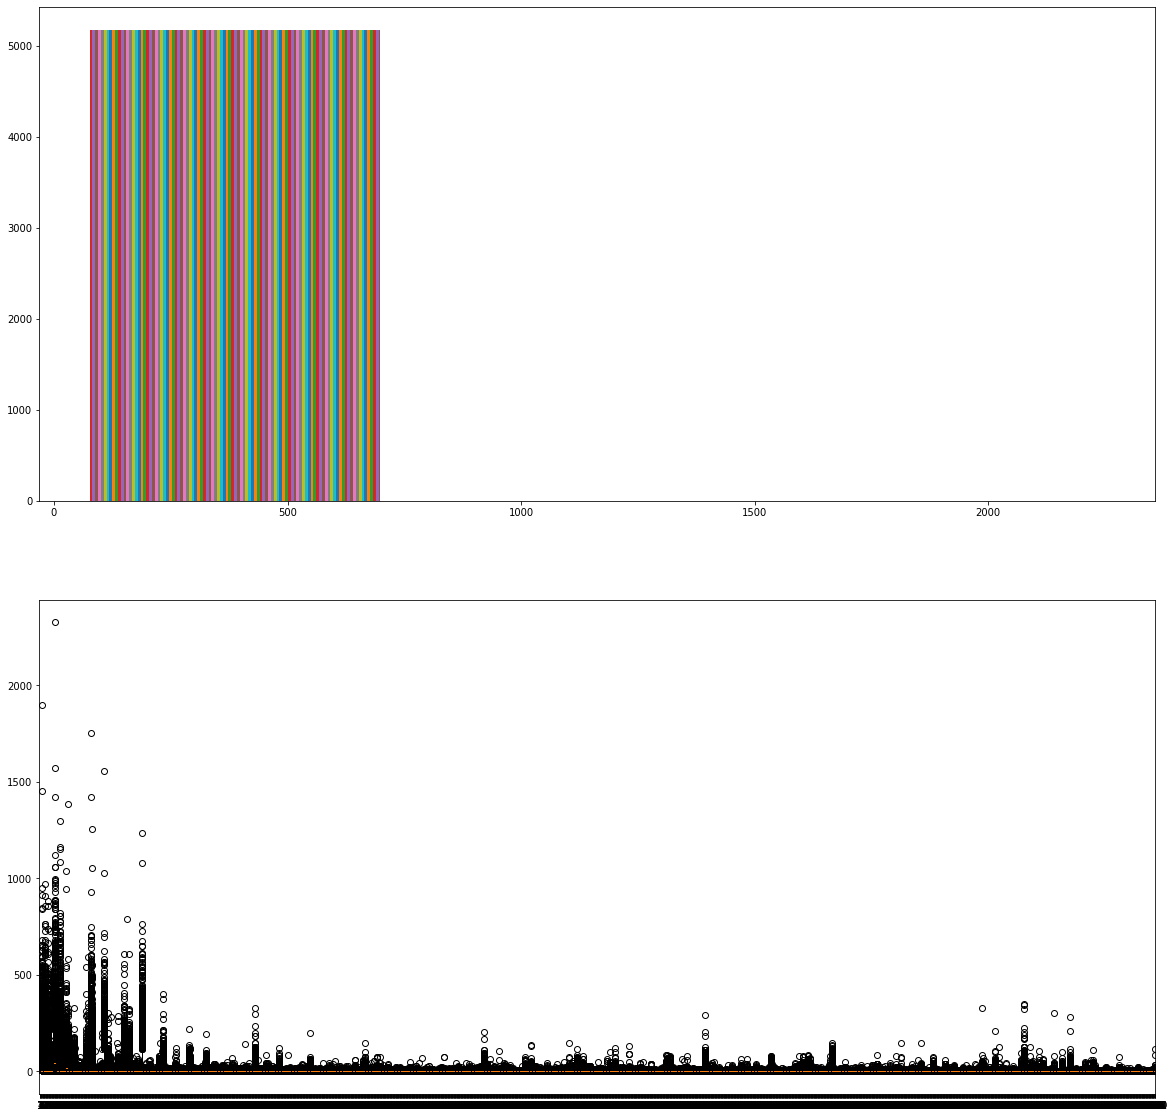

In [7]:
# drop first column that contains Name as Email1, Email2 etc. 
df=emails.drop(columns=emails.columns[0])
# change the dataframe in 2D array
arr=df.to_numpy()
print(arr)
# Creating histogram
fig, (axs1,axs2) = plt.subplots(2,figsize=(20,20))
 
axs1.hist(arr,bins=3)
axs2.boxplot(arr)
# Show plot
plt.show()

In [8]:
# Analyze the dataset
print('\nNumber of rows and columns: ',emails.shape)
print('\nCount null values in each columns: ')
print(emails.isnull().sum())
print('\nTotal number of null values :',emails.isnull().sum().sum())
print('\nNumber of duplicate rows :',emails.duplicated().sum())
print('\nNumber of duplicate columns: ',emails.columns.duplicated().sum())
print('\nDiscription of dataset: ')
display(emails.describe())
print('\nInfor of dataset: ')
display(emails.info())


Number of rows and columns:  (5172, 3002)

Count null values in each columns: 
Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

Total number of null values : 0

Number of duplicate rows : 0

Number of duplicate columns:  0

Discription of dataset: 


,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000



Infor of dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


None

Split the data into training and testing set

In [9]:
print(emails.columns)
# We do not need EmailNo column
emails.drop(columns='Email No.',inplace=True)

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)


Split independent and target variable 

In [10]:
x=emails.drop(columns='Prediction')
y=emails['Prediction']

Split training and testing data

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

Display training subsets

In [12]:
print(x_train[:10])
print(y_train[:10])

      the  to  ect  and  for  of    a  you  hou  in  ...  enhancements  \
2737   14   6   13    2    4   3   52    1    5   8  ...             0   
4445   33  26    7   21    9  16  242    6    2  59  ...             0   
3422    4   3    1    1    0   0   19    1    2   5  ...             0   
1595    0   2    1    0    0   0   26    1    1  12  ...             0   
1547    0   0    1    0    1   0    2    0    0   0  ...             0   
4390   27   8   10    9    7   3  125    2    3  20  ...             0   
1903   29   9    1    6    9  10  187    8    4  57  ...             0   
5098    8  10    2    3    7   7   78    2    2  15  ...             0   
1324    0   0    1    0    1   0    2    0    0   0  ...             0   
3088    8   7    7    1    6   0   61    0    4   9  ...             0   

      connevey  jay  valued  lay  infrastructure  military  allowing  ff  dry  
2737         0    0       0    0               0         0         0   1    0  
4445         0    0      

Display testing subsets

In [13]:
print(x_test[:10])
print(y_test[:10])

      the  to  ect  and  for  of    a  you  hou  in  ...  enhancements  \
3012    0   4    2    0    0   2   23    2    0   5  ...             0   
1682    0   0    1    0    1   0    2    0    0   0  ...             0   
1409    1   4    3    0    1   1   13    1    0   6  ...             0   
867    10  10    6    6    6   2   94    0    0  16  ...             0   
2958    0   1    5    0    1   0   10    0    2   0  ...             0   
384     2   7    4   11    6   2  108   10    1  26  ...             0   
3548    1   0    2    0    0   0   10    0    0   0  ...             0   
1171    1   1    2    0    1   1   27    1    0   3  ...             0   
1093    0   1    1    0    1   0   19    1    1   7  ...             0   
2426    6   5    7    2    2   0   60    2    2   9  ...             0   

      connevey  jay  valued  lay  infrastructure  military  allowing  ff  dry  
3012         0    0       0    0               0         0         0   1    0  
1682         0    0      

Function to measure performance and show confusion matrix

In [14]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred))
    print("Recall : ", recall_score(y_test, y_pred))
    print("Accuracy Score : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred))
    print("\n", confusion_matrix(y_test, y_pred))
    print("")
    
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels=['Spam', 'Not Spam'] )
    cm_display.plot()
    plt.show()

Naive Bayes Model

In [15]:
# Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(x_train, y_train)
# making predictions on the testing set
y_pred = gnb.predict(x_test)

Precision :  0.89171974522293
Recall :  0.958904109589041
Accuracy Score :  0.9555555555555556
F1 Score :  0.9240924092409241

 [[709  34]
 [ 12 280]]



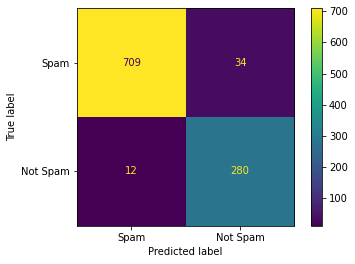

In [16]:
perform(y_pred)

KNN Model

In [17]:
# Create an instance of KNN class. Neighbors size=5 and p=2 means use Euclidean distance 
classifier=KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
# Train our data by fitting the data into our model
classifier.fit(x_train,y_train)
# Now predict the output
y_pred=classifier.predict(x_test)

Precision :  0.7005494505494505
Recall :  0.8732876712328768
Accuracy Score :  0.8589371980676328
F1 Score :  0.7774390243902438

 [[634 109]
 [ 37 255]]



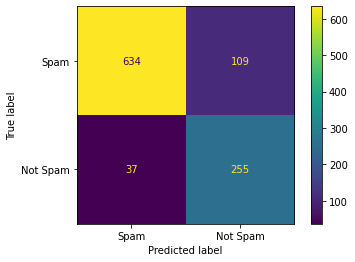

In [18]:
perform(y_pred)

Decision Tree Model

In [19]:
# Creating instance of Decision Tree Classifier
DC=DecisionTreeClassifier()
# Fit the model
DC.fit(x_train,y_train)
# Predict the result
y_pred=DC.predict(x_test)

Precision :  0.8865979381443299
Recall :  0.8835616438356164
Accuracy Score :  0.9352657004830918
F1 Score :  0.8850771869639794

 [[710  33]
 [ 34 258]]



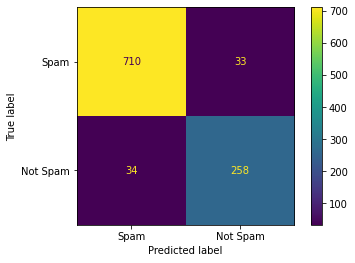

In [20]:
perform(y_pred)

In [21]:
feature_names =emails.columns[0:3000]
viz = emails.copy()
viz["Prediction"]=viz["Prediction"].values.astype(str)
print(viz.dtypes)
target_names = viz['Prediction'].unique().tolist()

the            int64
to             int64
ect            int64
and            int64
for            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction    object
Length: 3001, dtype: object


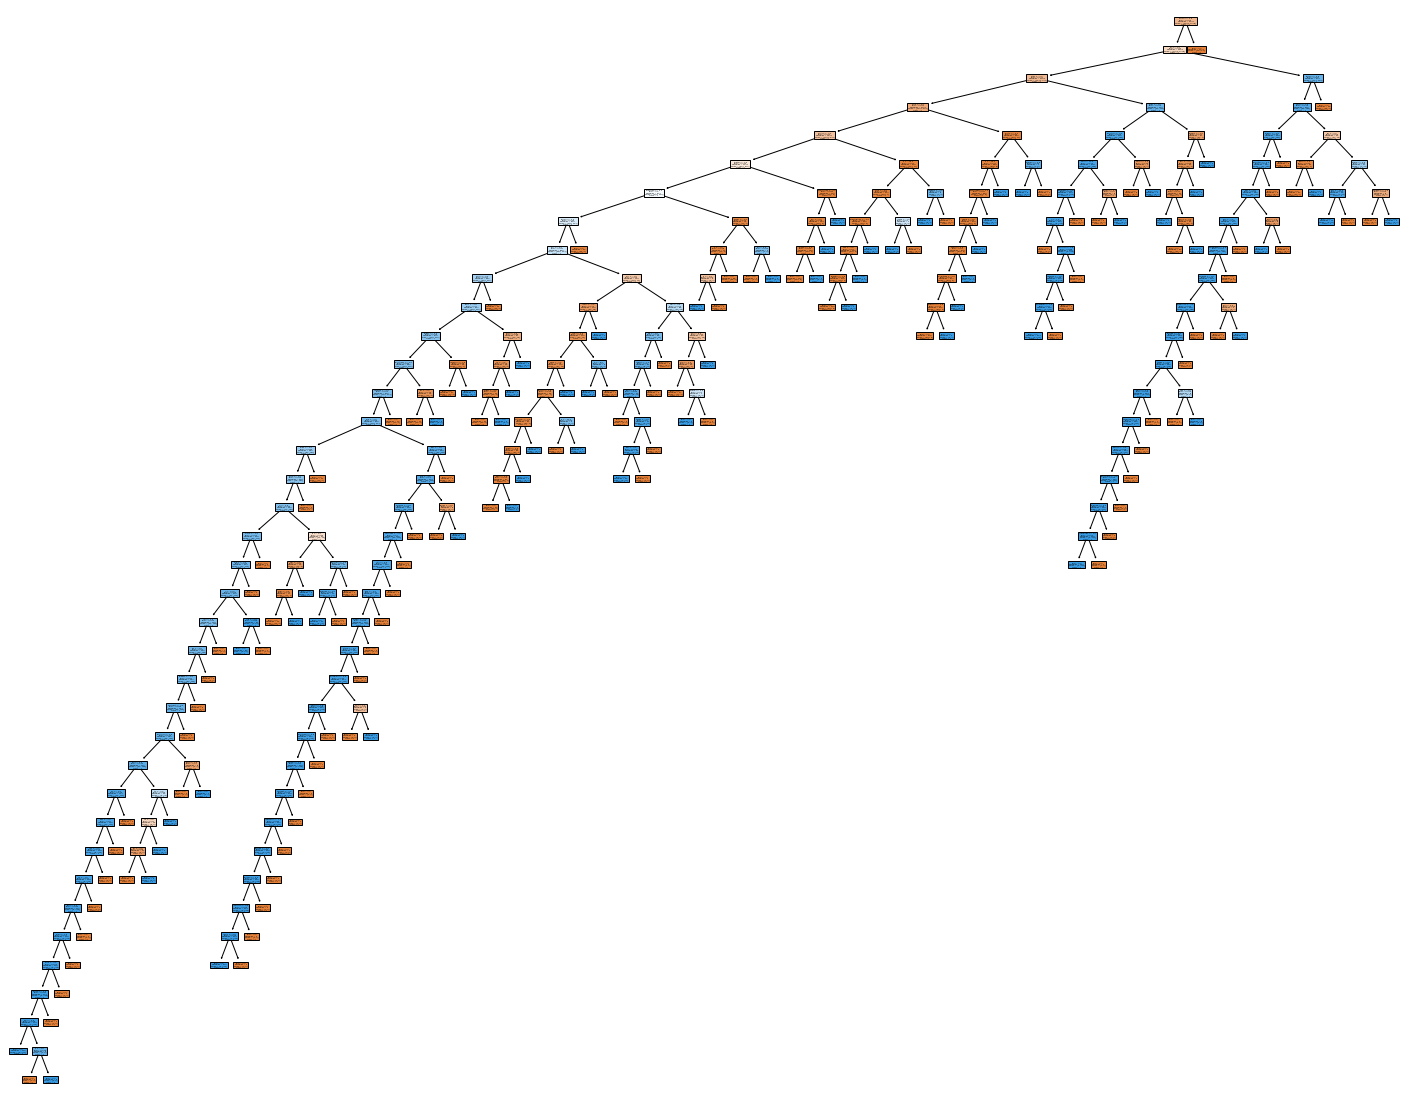

In [22]:
from sklearn.tree import plot_tree # tree diagram

plt.figure(figsize=(25, 20))
plot_tree(DC, feature_names = feature_names, class_names = target_names, filled = True, rounded = False)
plt.savefig('tree_visualization.png')





